In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for converting countryshortname to continent
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

#to get longitude and latitude data from country name
from geopy.geocoders import Nominatim

#to get population of each country
import datetime
import wbdata


#for creating a world map (User Distributions around the world)
import folium
from folium.plugins import MarkerCluster


#for A/B testing
import statsmodels
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_ind

#for supervised and unsupervised learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.cluster import KMeans

#k-means
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")


C:\Users\12132\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [43]:
#Load Data
us_cases = pd.read_csv("C:\\Users\\12132\\Desktop\\John\\medium\\covid19\\us cases.csv", encoding='latin-1')

In [44]:
us_cases.head()

date     county       state     fips  cases  deaths
0  1/21/2020  Snohomish  Washington  53061.0      1       0
1  1/22/2020  Snohomish  Washington  53061.0      1       0
2  1/23/2020  Snohomish  Washington  53061.0      1       0
3  1/24/2020       Cook    Illinois  17031.0      1       0
4  1/24/2020  Snohomish  Washington  53061.0      1       0

In [45]:
County= pd.read_csv("C:\\Users\\12132\\Desktop\\John\\medium\\covid19\\County.csv", encoding='latin-1')
County.head()

fips          county state  median_age  total_pop      male    female  \
0  1001  Autauga County    AL        38.5      56903  0.488270  0.511730   
1  1003  Baldwin County    AL        42.9     214651  0.489916  0.510084   
2  1005  Barbour County    AL        39.9      26585  0.534437  0.465563   
3  1007     Bibb County    AL        39.1      23003  0.539973  0.460027   
4  1009   Blount County    AL        40.8      57971  0.496041  0.503959   

   male_pop  median_male_age  fem_pop        ...         hispanic_pop  \
0     27784             37.2    29119        ...                 1634   
1    105161             41.6   109490        ...                 9550   
2     14208             37.9    12377        ...                 1372   
3     12421             37.7    10582        ...                  646   
4     28756             39.8    29215        ...                 5450   

   white_pop  black_pop  native_pop  asian_pop  pacific_pop  other_pop  \
0      42335      10947         229        673           41         45   
1     177945      18957        1479       2547           79        272   
2      12242      12440          76        108           24         13   
3      17099       4902          77         22            7         20   
4      50407        842         256        131           24         35   

   multiple_pop  avg_hh_income  median_hh_income  
0           999          71816             65642  
1          3822          77054             63462  
2           310          49037             37602  
3           230          57325             51125  
4           826          62290             55413  

[5 rows x 27 columns]

In [46]:
#group by date
df = us_cases.groupby(['fips','date'])['cases', 'deaths'].agg(['sum']).round(2).reset_index()
df.columns =  ['fips', 'date', 'cases', 'deaths']

In [47]:
fatality = us_cases.groupby(['fips'])['cases', 'deaths'].agg(['sum']).round(2).reset_index()
fatality.columns = ['fips', 'cases', 'deaths']
fatality['fatality_rate'] = fatality['deaths']/fatality['cases']

In [48]:
#merge
df = df.merge(fatality[['fips', 'fatality_rate']], on='fips', how='left')

In [49]:
df.head()

fips       date  cases  deaths  fatality_rate
0  1001.0  3/24/2020      1       0       0.047109
1  1001.0  3/25/2020      4       0       0.047109
2  1001.0  3/26/2020      6       0       0.047109
3  1001.0  3/27/2020      6       0       0.047109
4  1001.0  3/28/2020      6       0       0.047109

In [50]:
#merge
df = df.merge(County, on='fips', how='left')

In [51]:
df.head()

fips       date  cases  deaths  fatality_rate          county state  \
0  1001.0  3/24/2020      1       0       0.047109  Autauga County    AL   
1  1001.0  3/25/2020      4       0       0.047109  Autauga County    AL   
2  1001.0  3/26/2020      6       0       0.047109  Autauga County    AL   
3  1001.0  3/27/2020      6       0       0.047109  Autauga County    AL   
4  1001.0  3/28/2020      6       0       0.047109  Autauga County    AL   

   median_age  total_pop     male        ...         hispanic_pop  white_pop  \
0        38.5      56903  0.48827        ...                 1634      42335   
1        38.5      56903  0.48827        ...                 1634      42335   
2        38.5      56903  0.48827        ...                 1634      42335   
3        38.5      56903  0.48827        ...                 1634      42335   
4        38.5      56903  0.48827        ...                 1634      42335   

   black_pop  native_pop  asian_pop  pacific_pop  other_pop  multiple_pop  \
0      10947         229        673           41         45           999   
1      10947         229        673           41         45           999   
2      10947         229        673           41         45           999   
3      10947         229        673           41         45           999   
4      10947         229        673           41         45           999   

   avg_hh_income  median_hh_income  
0          71816             65642  
1          71816             65642  
2          71816             65642  
3          71816             65642  
4          71816             65642  

[5 rows x 31 columns]

In [52]:
df.dtypes

fips                float64
date                 object
cases                 int64
deaths                int64
fatality_rate       float64
county               object
state                object
median_age          float64
total_pop             int64
male                float64
female              float64
male_pop              int64
median_male_age     float64
fem_pop               int64
median_fem_age      float64
asian               float64
black               float64
hispanic            float64
white               float64
native              float64
others              float64
hispanic_pop          int64
white_pop             int64
black_pop             int64
native_pop            int64
asian_pop             int64
pacific_pop           int64
other_pop             int64
multiple_pop          int64
avg_hh_income         int64
median_hh_income      int64
dtype: object

Death rate vs. race by county

In [63]:
df_race = df.groupby(['fips','black'])['cases', 'deaths'].agg({'cases': 'sum',
                                                              'deaths':'sum'}).reset_index()
df_race['fatality'] = df_race['deaths']/df_race['cases']

In [64]:
df_race.head()

fips     black  cases  deaths  fatality
0  1001.0  0.192380    467      22  0.047109
1  1003.0  0.088315   1681      35  0.020821
2  1005.0  0.467933    230       0  0.000000
3  1007.0  0.213103    354       0  0.000000
4  1009.0  0.014525    351       0  0.000000

In [65]:
url = 'https://covidtracking.com/api/v1/states/daily.csv'
states = pd.read_csv(url,
                     parse_dates=['date'],
                     index_col=['state', 'date']).sort_index()

# Note: GU/AS/VI do not have enough data for this model to run
# Note: PR had -384 change recently in total count so unable to model
states = states.drop(['MP', 'GU', 'AS', 'PR', 'VI'])

In [67]:
states.head(20)

positive  negative  pending  hospitalizedCurrently  \
state date                                                             
AK    2020-03-06       0.0       8.0      1.0                    NaN   
      2020-03-07       0.0      12.0      2.0                    NaN   
      2020-03-08       0.0      14.0      6.0                    NaN   
      2020-03-09       0.0      23.0      9.0                    NaN   
      2020-03-10       0.0      23.0      9.0                    NaN   
      2020-03-11       0.0      46.0     14.0                    NaN   
      2020-03-12       0.0      46.0     14.0                    NaN   
      2020-03-13       1.0      59.0      NaN                    NaN   
      2020-03-14       1.0     143.0      NaN                    NaN   
      2020-03-15       1.0     143.0      NaN                    NaN   
      2020-03-16       1.0     143.0      NaN                    NaN   
      2020-03-17       3.0     334.0      NaN                    NaN   
      2020-03-18       6.0     406.0      NaN                    NaN   
      2020-03-19       6.0     432.0      NaN                    NaN   
      2020-03-20      12.0     686.0      NaN                    NaN   
      2020-03-21      14.0     758.0      NaN                    NaN   
      2020-03-22      22.0     946.0      NaN                    NaN   
      2020-03-23      22.0     946.0      NaN                    NaN   
      2020-03-24      36.0     986.0      NaN                    NaN   
      2020-03-25      42.0    1649.0      NaN                    NaN   

                  hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
state date                                                                  
AK    2020-03-06                     NaN             NaN              NaN   
      2020-03-07                     NaN             NaN              NaN   
      2020-03-08                     NaN             NaN              NaN   
      2020-03-09                     NaN             NaN              NaN   
      2020-03-10                     NaN             NaN              NaN   
      2020-03-11                     NaN             NaN              NaN   
      2020-03-12                     NaN             NaN              NaN   
      2020-03-13                     NaN             NaN              NaN   
      2020-03-14                     NaN             NaN              NaN   
      2020-03-15                     NaN             NaN              NaN   
      2020-03-16                     NaN             NaN              NaN   
      2020-03-17                     NaN             NaN              NaN   
      2020-03-18                     NaN             NaN              NaN   
      2020-03-19                     NaN             NaN              NaN   
      2020-03-20                     NaN             NaN              NaN   
      2020-03-21                     0.0             NaN              NaN   
      2020-03-22                     0.0             NaN              NaN   
      2020-03-23                     0.0             NaN              NaN   
      2020-03-24                     0.0             NaN              NaN   
      2020-03-25                     1.0             NaN              NaN   

                  onVentilatorCurrently  onVentilatorCumulative  recovered  \
state date                                                                   
AK    2020-03-06                    NaN                     NaN        NaN   
      2020-03-07                    NaN                     NaN        NaN   
      2020-03-08                    NaN                     NaN        NaN   
      2020-03-09                    NaN                     NaN        NaN   
      2020-03-10                    NaN                     NaN        NaN   
      2020-03-11                    NaN                     NaN        NaN   
      2020-03-12                    NaN                     NaN        NaN   
      2020-03-13                    

In [3]:
#traffic and cases
#Load Data
dt = pd.read_csv("C:\\Users\\12132\\Desktop\\John\\medium\\covid19\\traffic and cases.csv", encoding='latin-1')

In [4]:
dt.head()

Date  SF_driving  SF_transit  SF_walking  CA_cases  CA_tests  \
0  1/13/2020      100.00      100.00      100.00       NaN       NaN   
1  1/14/2020      104.21      101.59      106.46       NaN       NaN   
2  1/15/2020      106.18      104.05       98.83       NaN       NaN   
3  1/16/2020      106.36       97.69       74.53       NaN       NaN   
4  1/17/2020      122.64      115.19       99.76       NaN       NaN   

   Denver_driving  Denver_transit  Denver_walking  CO_cases    ...     \
0          100.00          100.00          100.00       NaN    ...      
1          104.86          104.60          112.49       NaN    ...      
2          107.71          101.34          116.01       NaN    ...      
3          110.23          100.92          117.08       NaN    ...      
4          125.77          109.74          147.09       NaN    ...      

   Houston_driving  Houston_transit  Houston_walking  TX_cases  TX_tests  \
0           100.00           100.00           100.00       NaN       NaN   
1           102.34            99.97           103.48       NaN       NaN   
2           106.95           102.76           108.19       NaN       NaN   
3           107.64           102.02           108.28       NaN       NaN   
4           124.28           105.19           126.26       NaN       NaN   

   Seattle_driving  Seattle_transit  Seattle_walking  WA_cases  WA_tests  
0           100.00           100.00           100.00       NaN       NaN  
1            91.43            96.87           101.74       NaN       NaN  
2           105.28            91.73           100.47       NaN       NaN  
3           128.93            98.76           125.25       NaN       NaN  
4           150.42           101.14           150.39       NaN       NaN  

[5 rows x 61 columns]

In [5]:
#Replace NaN with zero
dt = dt.fillna(0)

In [6]:
dt.head()

Date  SF_driving  SF_transit  SF_walking  CA_cases  CA_tests  \
0  1/13/2020      100.00      100.00      100.00       0.0       0.0   
1  1/14/2020      104.21      101.59      106.46       0.0       0.0   
2  1/15/2020      106.18      104.05       98.83       0.0       0.0   
3  1/16/2020      106.36       97.69       74.53       0.0       0.0   
4  1/17/2020      122.64      115.19       99.76       0.0       0.0   

   Denver_driving  Denver_transit  Denver_walking  CO_cases    ...     \
0          100.00          100.00          100.00       0.0    ...      
1          104.86          104.60          112.49       0.0    ...      
2          107.71          101.34          116.01       0.0    ...      
3          110.23          100.92          117.08       0.0    ...      
4          125.77          109.74          147.09       0.0    ...      

   Houston_driving  Houston_transit  Houston_walking  TX_cases  TX_tests  \
0           100.00           100.00           100.00       0.0       0.0   
1           102.34            99.97           103.48       0.0       0.0   
2           106.95           102.76           108.19       0.0       0.0   
3           107.64           102.02           108.28       0.0       0.0   
4           124.28           105.19           126.26       0.0       0.0   

   Seattle_driving  Seattle_transit  Seattle_walking  WA_cases  WA_tests  
0           100.00           100.00           100.00       0.0       0.0  
1            91.43            96.87           101.74       0.0       0.0  
2           105.28            91.73           100.47       0.0       0.0  
3           128.93            98.76           125.25       0.0       0.0  
4           150.42           101.14           150.39       0.0       0.0  

[5 rows x 61 columns]

In [7]:
dt.dtypes

Date                      object
SF_driving               float64
SF_transit               float64
SF_walking               float64
CA_cases                 float64
CA_tests                 float64
Denver_driving           float64
Denver_transit           float64
Denver_walking           float64
CO_cases                 float64
CO_tests                 float64
Miami_driving            float64
Miami_transit            float64
Miami_walking            float64
FL_cases                 float64
FL_tests                 float64
Atlanta_driving          float64
Atlanta_transit          float64
Atlanta_walking          float64
GA_cases                 float64
GA_tests                 float64
Chicago_driving          float64
Chicago_transit          float64
Chicago_walking          float64
IL_cases                 float64
IL_tests                 float64
Boston_driving           float64
Boston_transit           float64
Boston_walking           float64
MA_cases                 float64
          

In [8]:
dt["Date"] = pd.to_datetime(dt["Date"])

In [9]:
dt = dt.reset_index().set_index("Date", drop=True)

In [10]:
#plot
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y-%m-%d')

In [11]:
def trend_plot(col1, col2, col3, col4, city, state, date):
    
    plt_dt = dt[[col1, col2, col3, col4]]
    plt_dt['Daily_Increase_percent_Covid19'] = ((plt_dt[col4]/plt_dt[col4].shift(1))-1).round(4)*100
    plt_dt['Daily_Increase_Covid19'] = plt_dt[col4]-plt_dt[col4].shift(1)
    

    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(12, 8))

    plt.tight_layout()
    sns.lineplot(data=plt_dt[[col1, col2, col3]], palette=["#69BE28", "#00a2ed", 'darkblue'],lw=2)
    plt.xlabel("Date",fontsize=14)
    plt.ylabel('Change in routing requests since January 13, 2020', fontsize=12)
    plt.legend(loc='lower left', fontsize=12)
    plt.axvline(x=date,  color ='gray').set_linestyle("--")
     
    #secondary y-axis
    ax1 = plt.twinx()
    sns.lineplot(data=plt_dt[[col4,'Daily_Increase_Covid19']],  palette=["y","purple"], lw=4)
    ax1.xaxis.set_major_formatter(myFmt)
    ax1.set_xticks(dt.index[::12]) 
    ax1.set_ylabel('# of Covid19 Cases', fontsize=14)



    ax1.set_title("Mobility Trends in " + city + " and Covid19 Trends in " + state)
    fig.savefig(city+ "_"+state+".pdf")
    return plt.show()

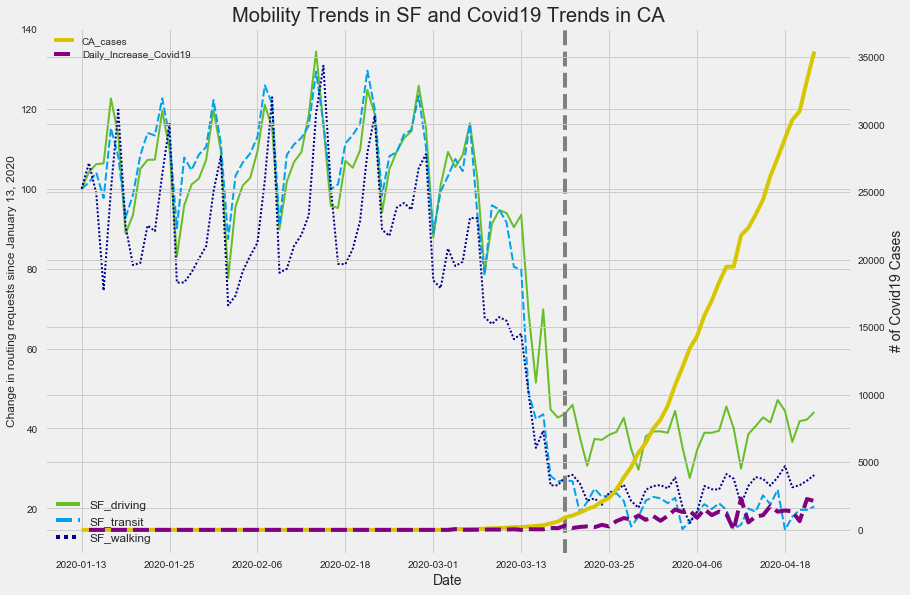

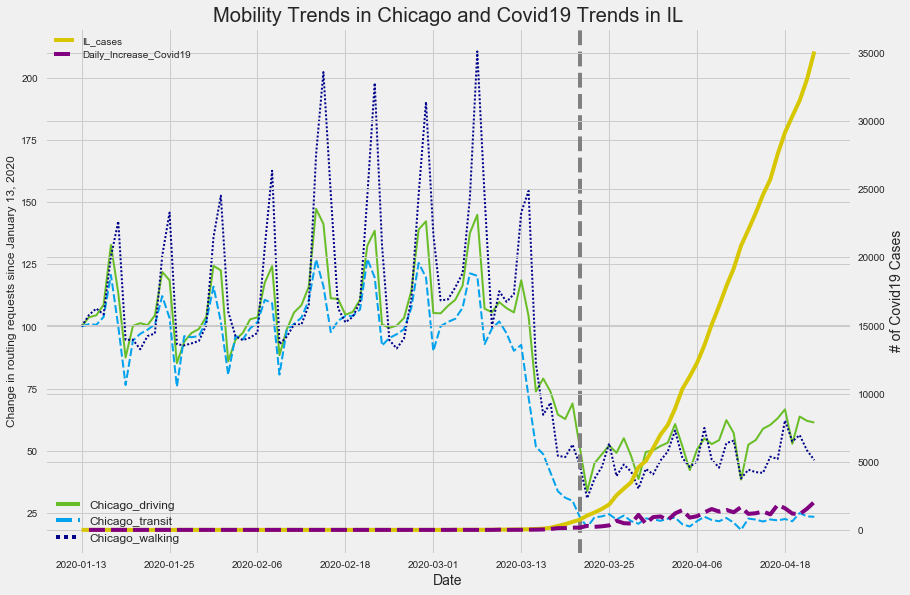

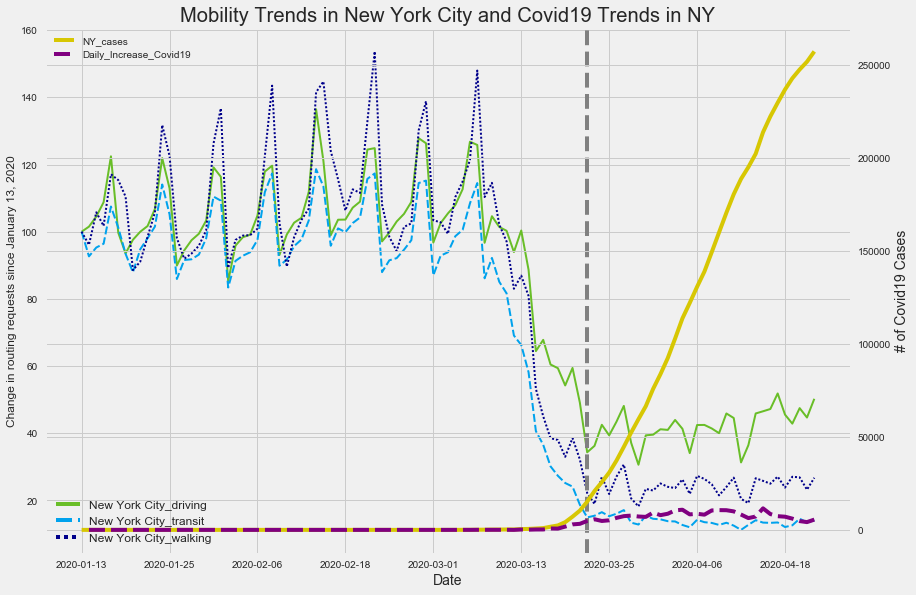

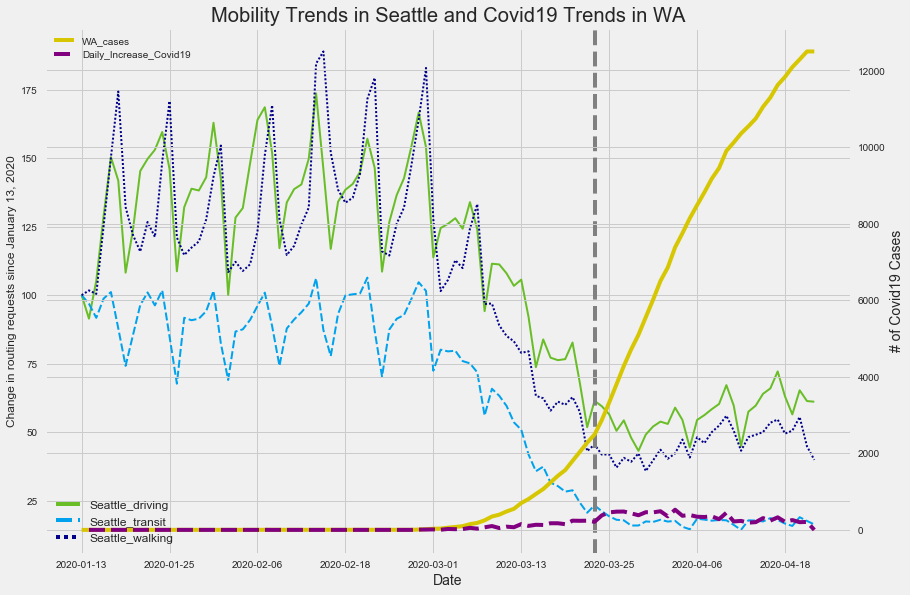

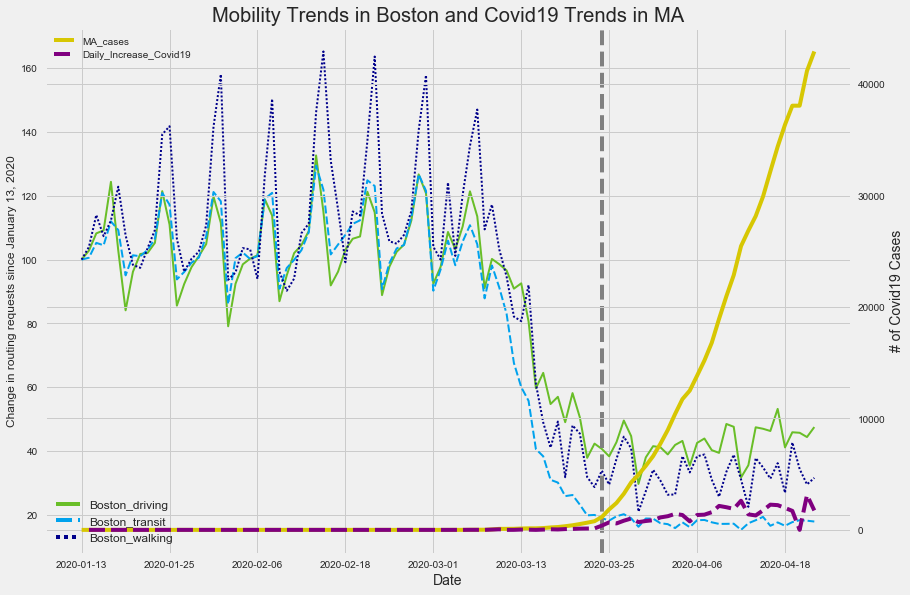

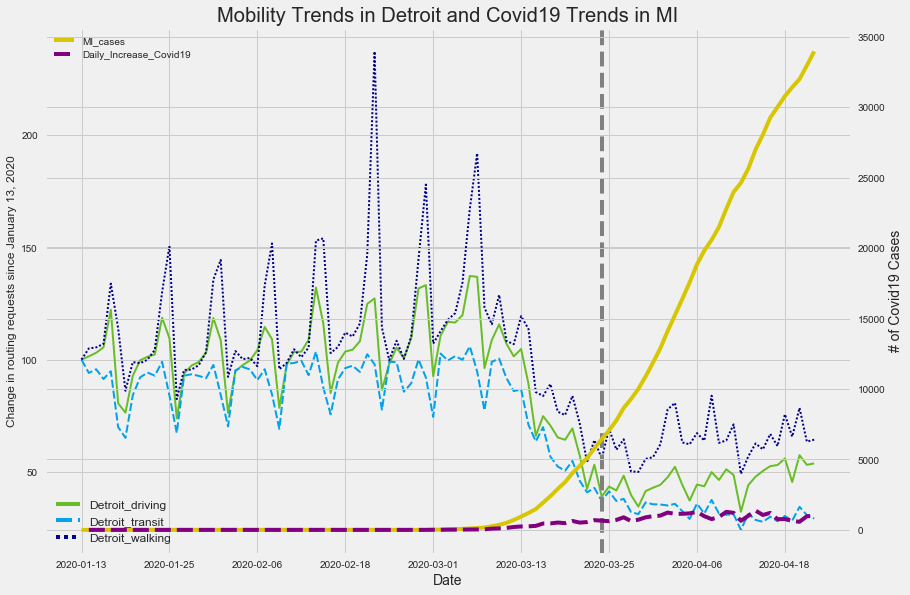

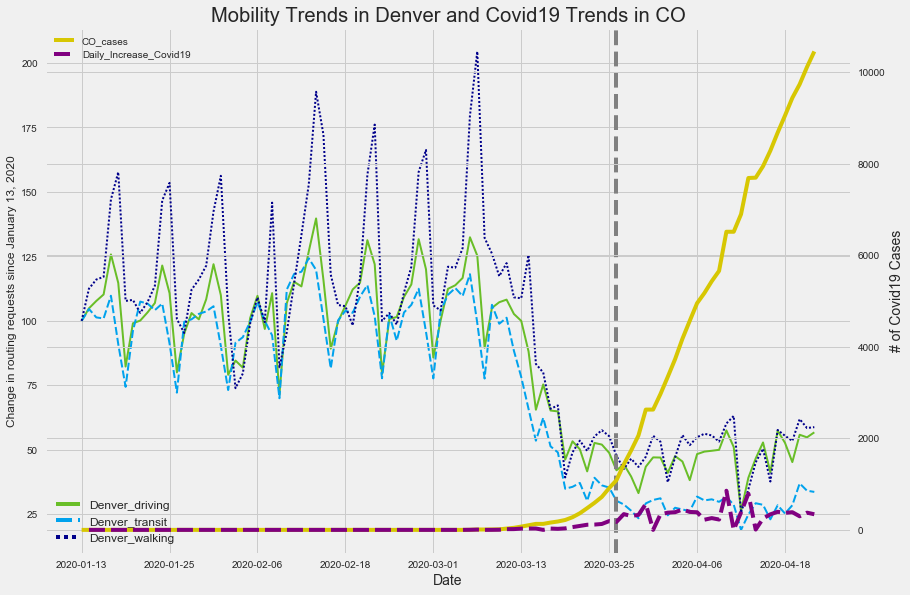

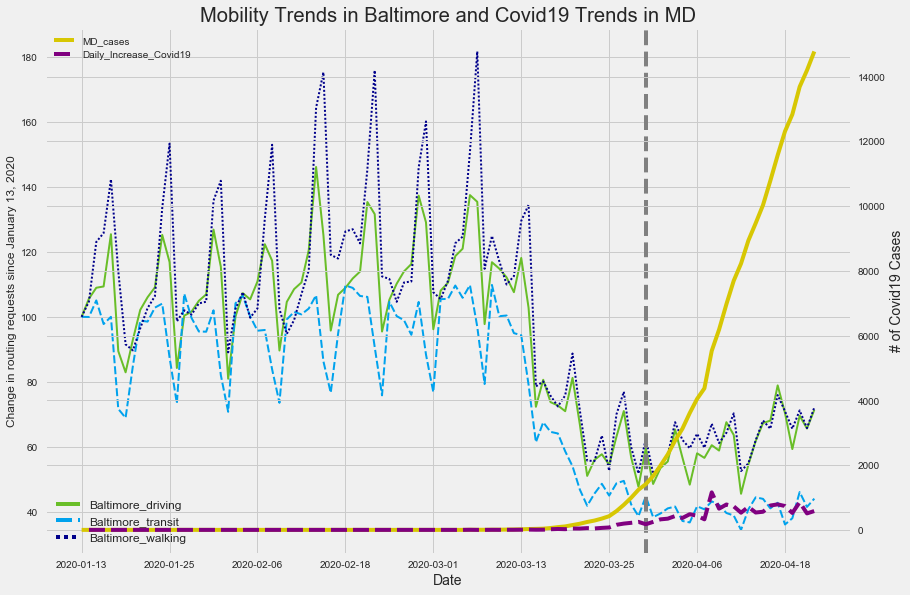

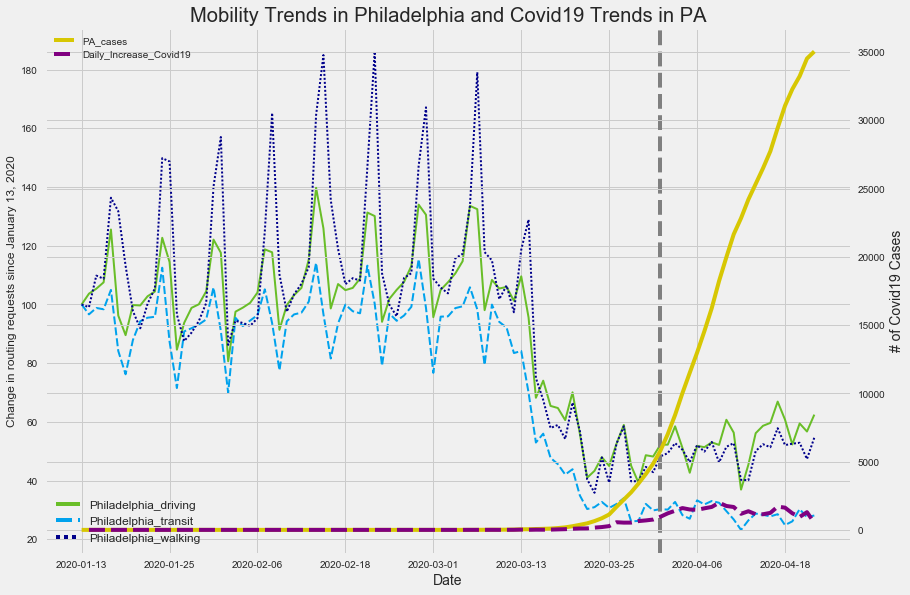

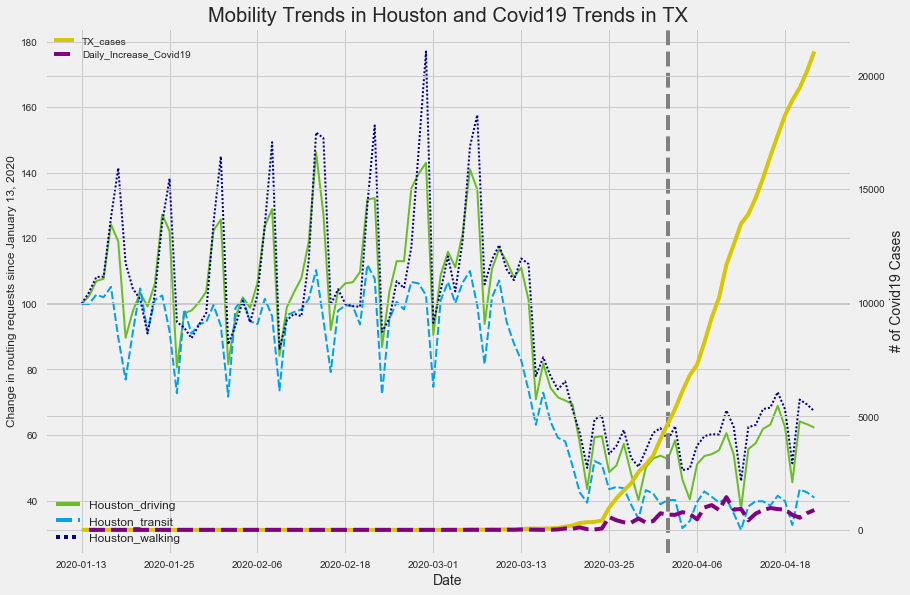

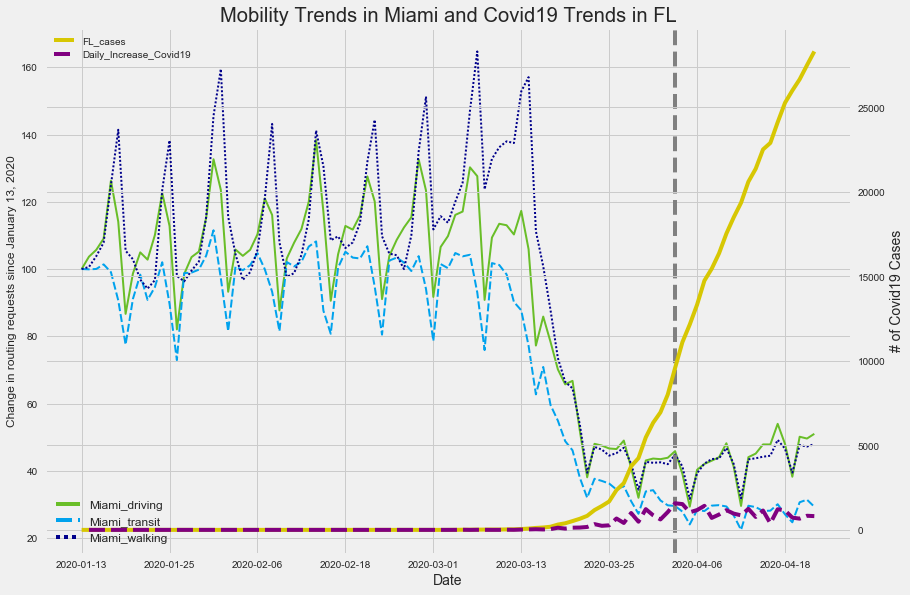

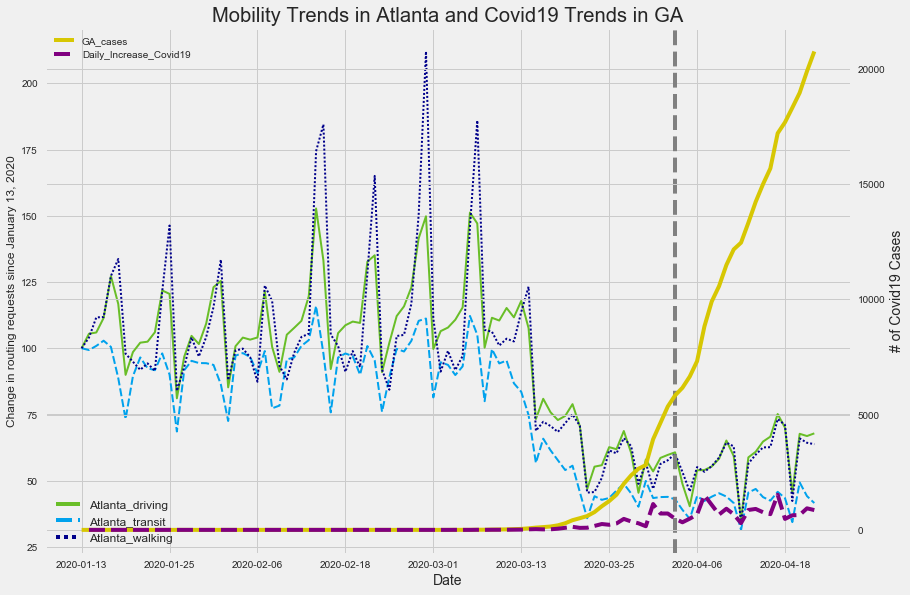

In [161]:
trend_plot('SF_driving', 'SF_transit', 'SF_walking','CA_cases', 'SF', 'CA', "2020-03-19")
trend_plot('Chicago_driving', 'Chicago_transit', 'Chicago_walking','IL_cases', 'Chicago', 'IL', "3/21/2020")
trend_plot('New York City_driving', 'New York City_transit', 'New York City_walking','NY_cases', 'New York City', 'NY', "3/22/2020")
trend_plot('Seattle_driving', 'Seattle_transit', 'Seattle_walking','WA_cases', 'Seattle', 'WA', "3/23/2020")
trend_plot('Boston_driving', 'Boston_transit', 'Boston_walking','MA_cases', 'Boston', 'MA', "3/24/2020")
trend_plot('Detroit_driving', 'Detroit_transit', 'Detroit_walking','MI_cases', 'Detroit', 'MI', "3/24/2020")
trend_plot('Denver_driving', 'Denver_transit', 'Denver_walking','CO_cases', 'Denver', 'CO', "3/26/2020")
trend_plot('Baltimore_driving', 'Baltimore_transit', 'Baltimore_walking','MD_cases', 'Baltimore', 'MD', "3/30/2020")
trend_plot('Philadelphia_driving', 'Philadelphia_transit', 'Philadelphia_walking','PA_cases', 'Philadelphia', 'PA', "4/01/2020")
trend_plot('Houston_driving', 'Houston_transit', 'Houston_walking','TX_cases', 'Houston', 'TX', "4/02/2020")
trend_plot('Miami_driving', 'Miami_transit', 'Miami_walking','FL_cases', 'Miami', 'FL', "4/3/2020")
trend_plot('Atlanta_driving', 'Atlanta_transit', 'Atlanta_walking','GA_cases', 'Atlanta', 'GA', "4/3/2020")

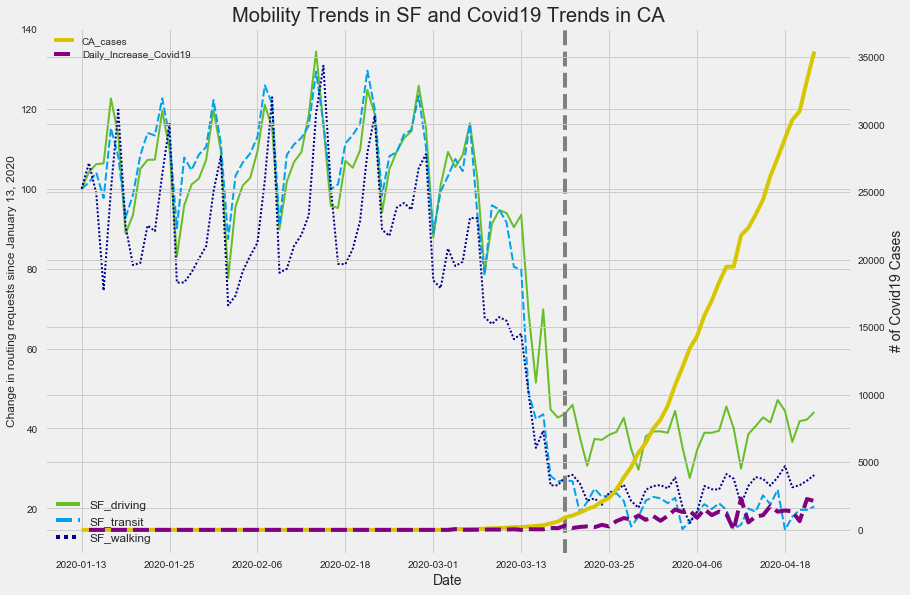

In [12]:
trend_plot('SF_driving', 'SF_transit', 'SF_walking','CA_cases', 'SF', 'CA', "2020-03-19")

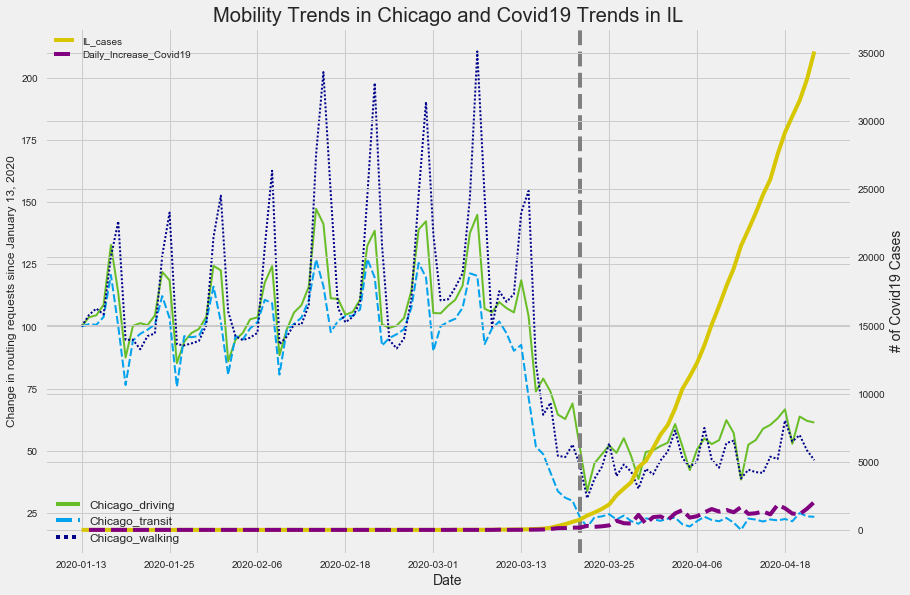

In [571]:
trend_plot('Chicago_driving', 'Chicago_transit', 'Chicago_walking','IL_cases', 'Chicago', 'IL', "3/21/2020")

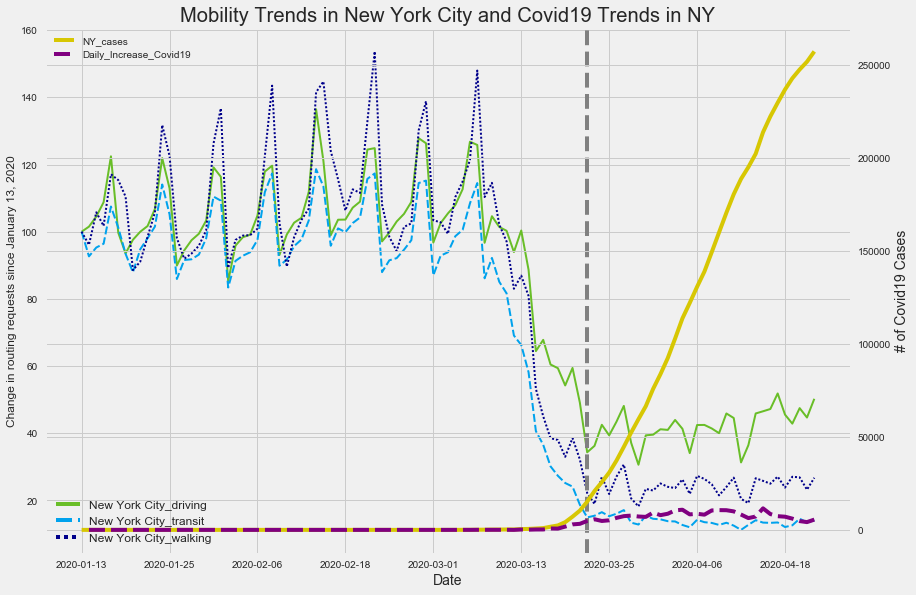

In [572]:
trend_plot('New York City_driving', 'New York City_transit', 'New York City_walking','NY_cases', 'New York City', 'NY', "3/22/2020")

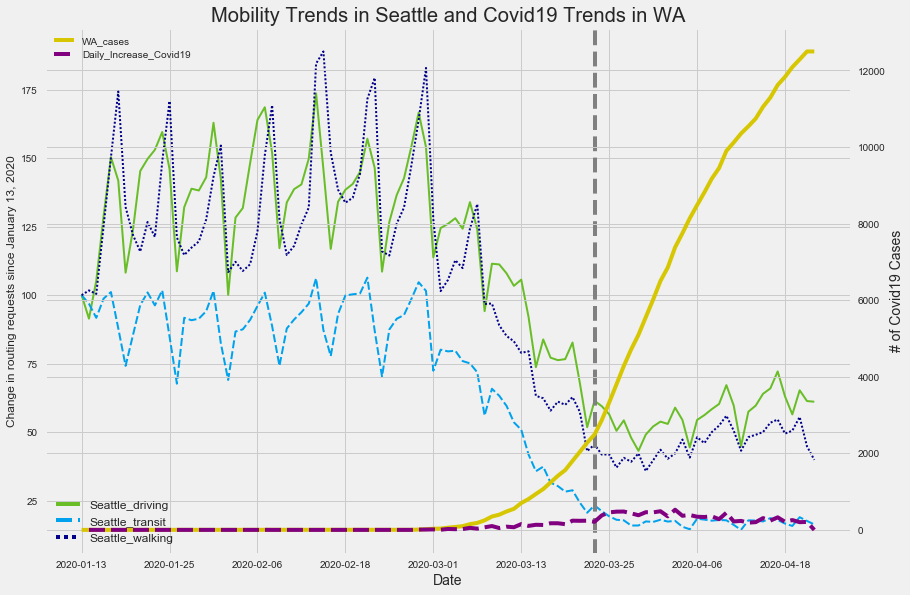

In [573]:
trend_plot('Seattle_driving', 'Seattle_transit', 'Seattle_walking','WA_cases', 'Seattle', 'WA', "3/23/2020")

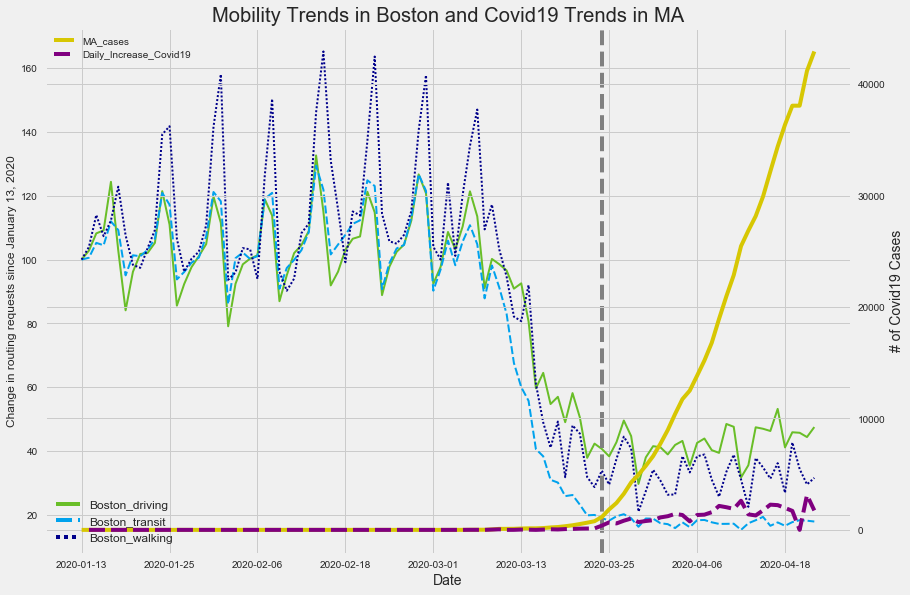

In [574]:
trend_plot('Boston_driving', 'Boston_transit', 'Boston_walking','MA_cases', 'Boston', 'MA', "3/24/2020")

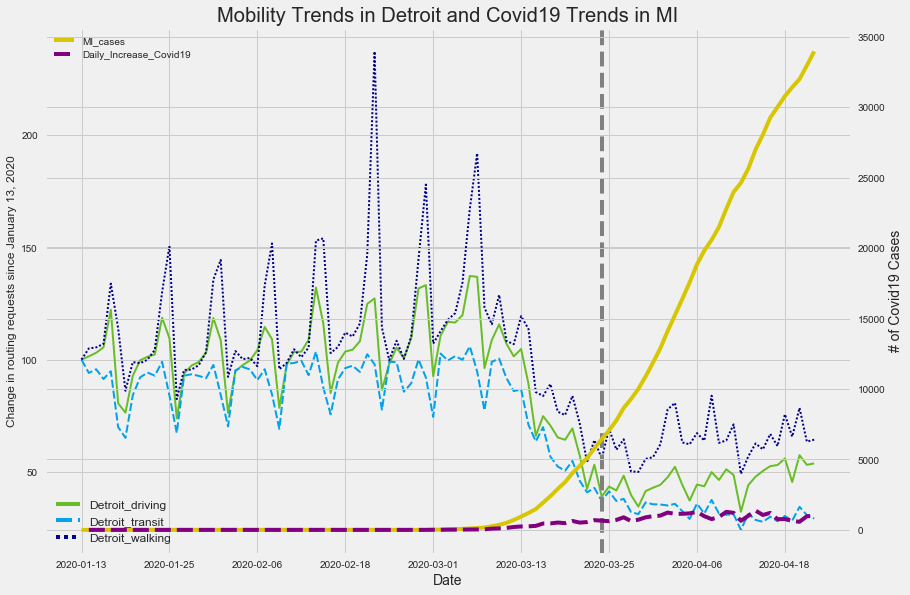

In [575]:
trend_plot('Detroit_driving', 'Detroit_transit', 'Detroit_walking','MI_cases', 'Detroit', 'MI', "3/24/2020")

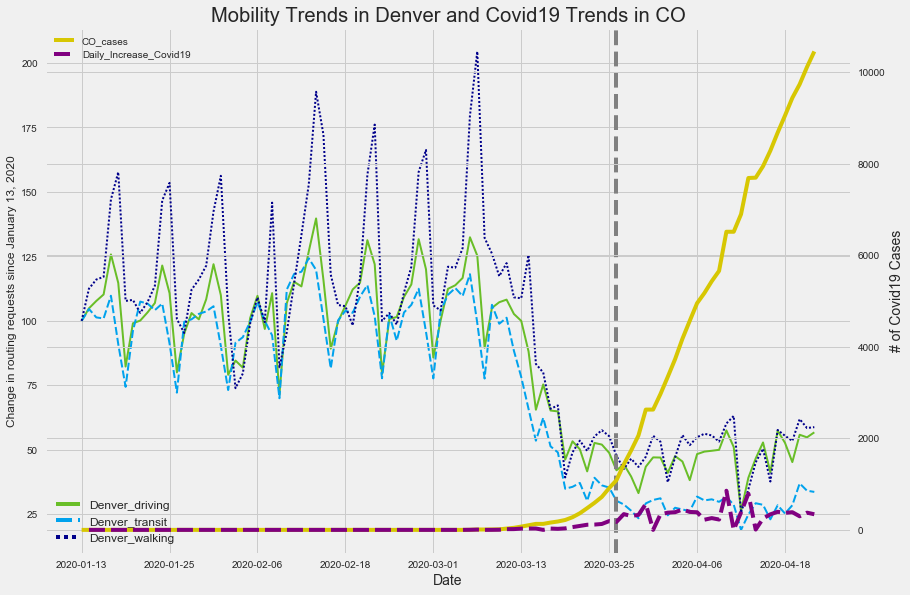

In [576]:
trend_plot('Denver_driving', 'Denver_transit', 'Denver_walking','CO_cases', 'Denver', 'CO', "3/26/2020")

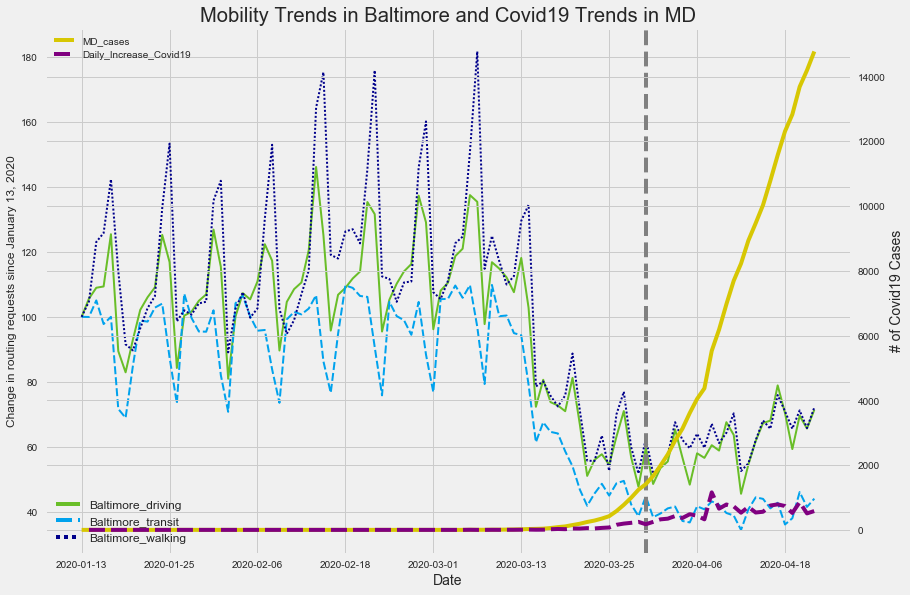

In [577]:
trend_plot('Baltimore_driving', 'Baltimore_transit', 'Baltimore_walking','MD_cases', 'Baltimore', 'MD', "3/30/2020")

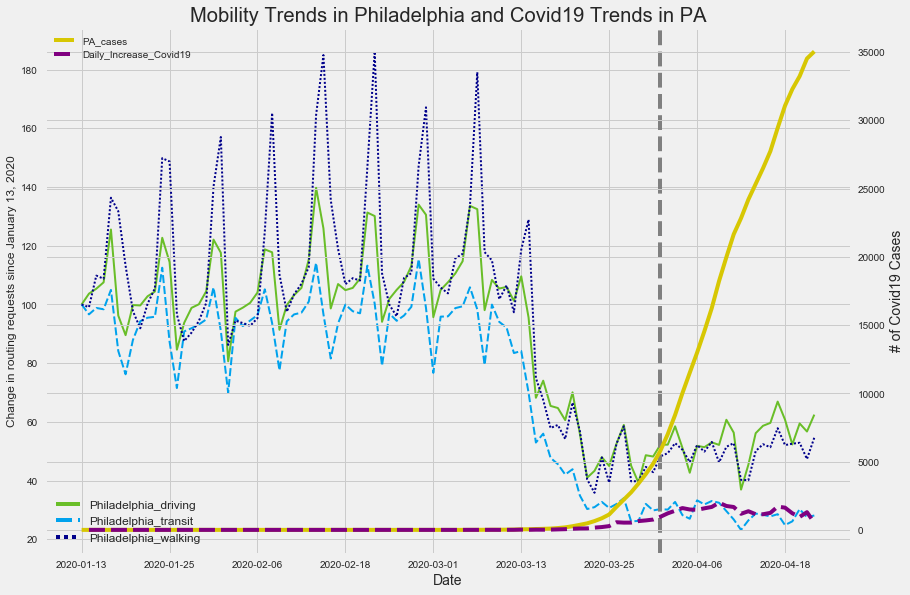

In [484]:
trend_plot('Philadelphia_driving', 'Philadelphia_transit', 'Philadelphia_walking','PA_cases', 'Philadelphia', 'PA', "4/01/2020")

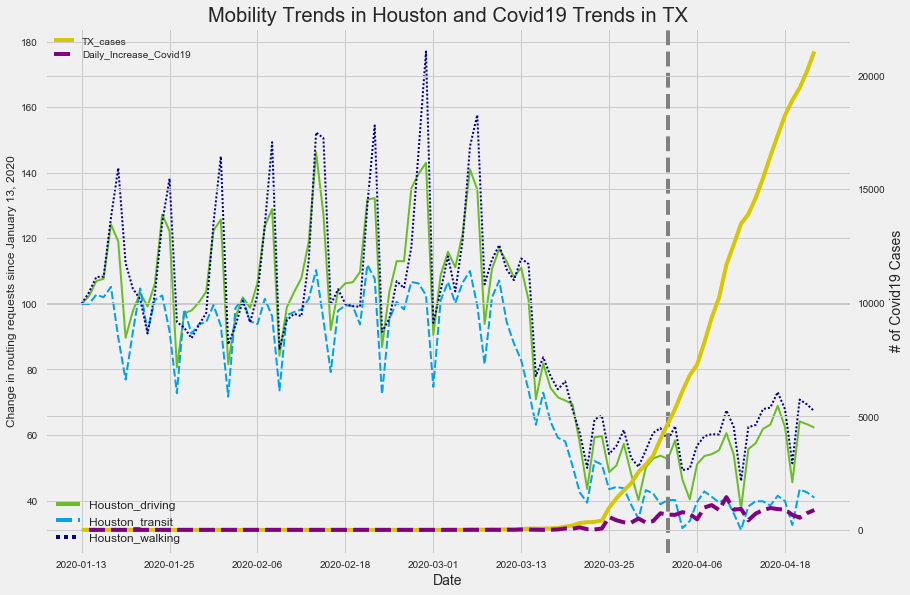

In [497]:
trend_plot('Houston_driving', 'Houston_transit', 'Houston_walking','TX_cases', 'Houston', 'TX', "4/02/2020")

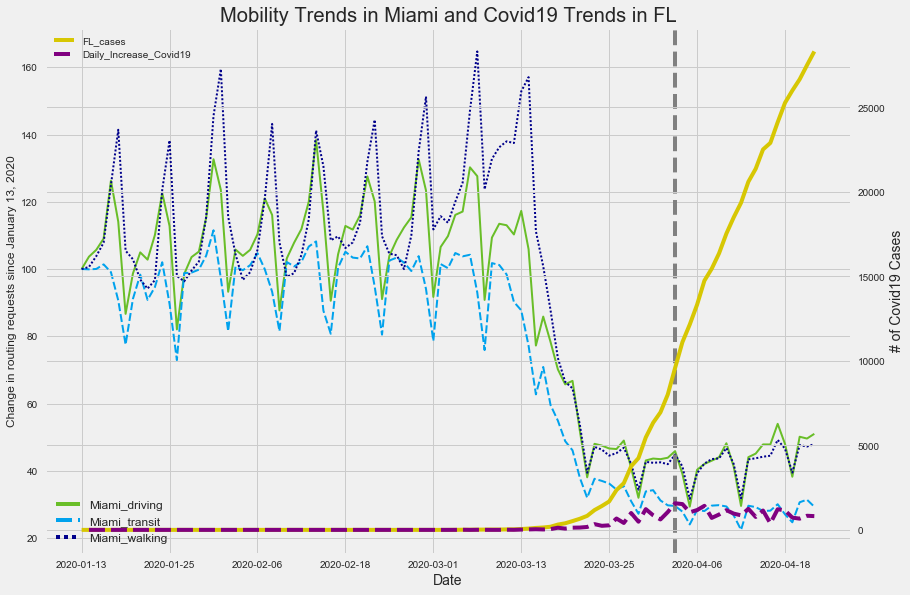

In [496]:
trend_plot('Miami_driving', 'Miami_transit', 'Miami_walking','FL_cases', 'Miami', 'FL', "4/3/2020")

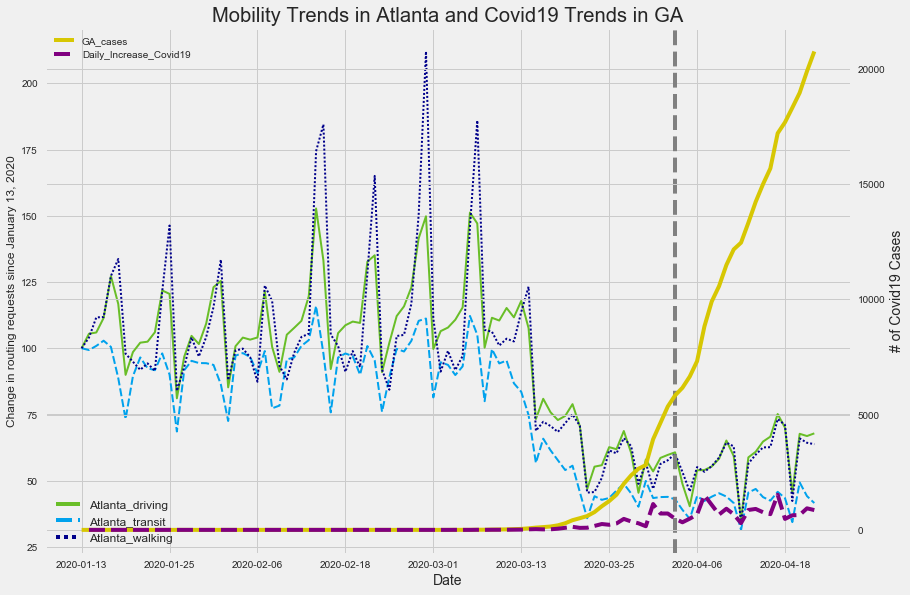

In [478]:
trend_plot('Atlanta_driving', 'Atlanta_transit', 'Atlanta_walking','GA_cases', 'Atlanta', 'GA', "4/3/2020")

<Figure size 1440x720 with 0 Axes>

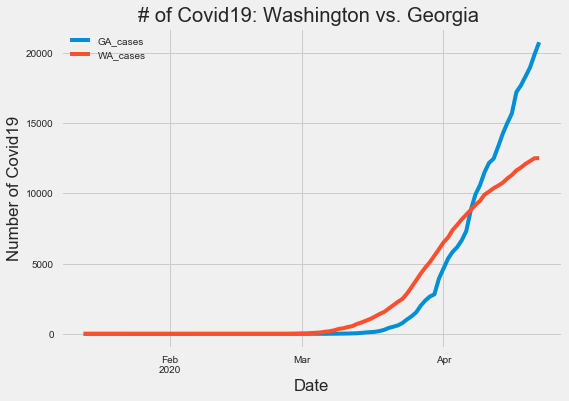

In [14]:
plt.figure(figsize=(20,10))
plt_dt = dt[['GA_cases', 'WA_cases']]
plt_dt.plot()
plt.ylabel('Number of Covid19')
plt.xlabel('Date')
plt.title('# of Covid19: Washington vs. Georgia ')
plt.show()





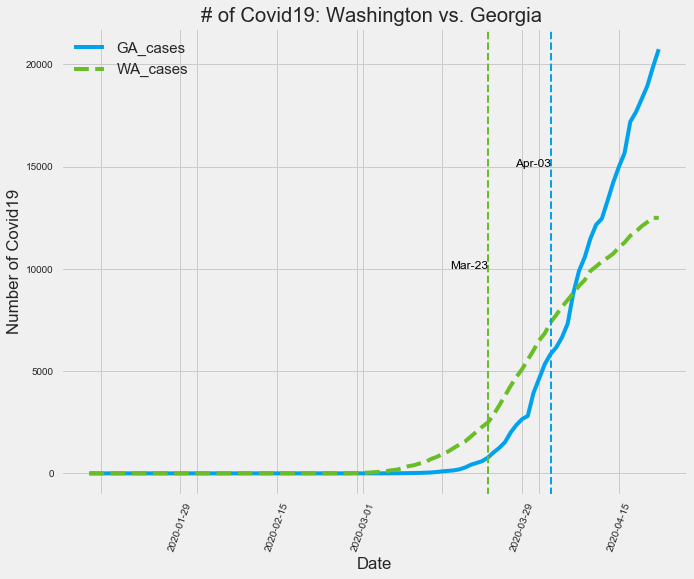

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(10,8))
ax = plt.gca()

# multiple line plot
plt.plot(plt_dt.index, 'GA_cases', data=plt_dt, color="#00a2ed", linewidth=4)
plt.axvline(x='2020-03-23',  color ="#69BE28",linewidth=2).set_linestyle("--")
plt.xticks(rotation=70)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
    
plt.plot( plt_dt.index, 'WA_cases', data=plt_dt, marker='', color="#69BE28", linewidth=4, linestyle='dashed')
plt.text("2020-03-23", 10000, 'Mar-23', horizontalalignment='right', size=12, color="black")
plt.axvline(x='2020-04-03',  color ="#00a2ed",linewidth=2).set_linestyle("--")
plt.text("2020-04-03", 15000, 'Apr-03', horizontalalignment='right', size=12, color="black")
#plt.xticks(rotation=70,fontsize=10)

plt.ylabel('Number of Covid19')
plt.xlabel('Date')
plt.title('# of Covid19: Washington vs. Georgia ')

    
plt.legend(fontsize=15)

In [164]:
#group
dt['group1_driving'] = (dt['SF_driving']+dt['Seattle_driving']+dt['Chicago_driving']+dt['Detroit_driving'])/4
dt['group2_driving'] = (dt['Philadelphia_driving']+dt['Houston_driving']+dt['Atlanta_driving']+dt['Miami_driving'])/4

dt['group1_walking'] = (dt['SF_walking']+dt['Seattle_walking']+dt['Chicago_walking']+dt['Detroit_walking'])/4
dt['group2_walking'] = (dt['Philadelphia_walking']+dt['Houston_walking']+dt['Atlanta_walking']+dt['Miami_walking'])/4


dt['group1_transit'] = (dt['SF_transit']+dt['Seattle_transit']+dt['Chicago_transit']+dt['Detroit_transit'])/4
dt['group2_transit'] = (dt['Philadelphia_transit']+dt['Houston_transit']+dt['Atlanta_transit']+dt['Miami_transit'])/4

dt['group1_cases'] = (dt['CA_cases']+dt['WA_cases']+dt['IL_cases']+dt['MI_cases'])/4
dt['group2_cases'] = (dt['PA_cases']+dt['TX_cases']+dt['GA_cases']+dt['FL_cases'])/4

dt['change_in_group1_driving']= (dt['group1_driving']/100-1).round(4)*100
dt['change_in_group2_driving']= (dt['group2_driving']/100-1).round(4)*100

dt['change_in_group1_walking']= (dt['group1_walking']/100-1).round(4)*100
dt['change_in_group2_walking']= (dt['group2_walking']/100-1).round(4)*100

dt['change_in_group1_transit']= (dt['group1_transit']/100-1).round(4)*100
dt['change_in_group2_transit']= (dt['group2_transit']/100-1).round(4)*100

dt['daily_increase_in_group1']= ((dt['group1_cases']/dt['group1_cases'].shift(1))-1).round(4)*100
dt['daily_increase_in_group2']= ((dt['group2_cases']/dt['group2_cases'].shift(1))-1).round(4)*100

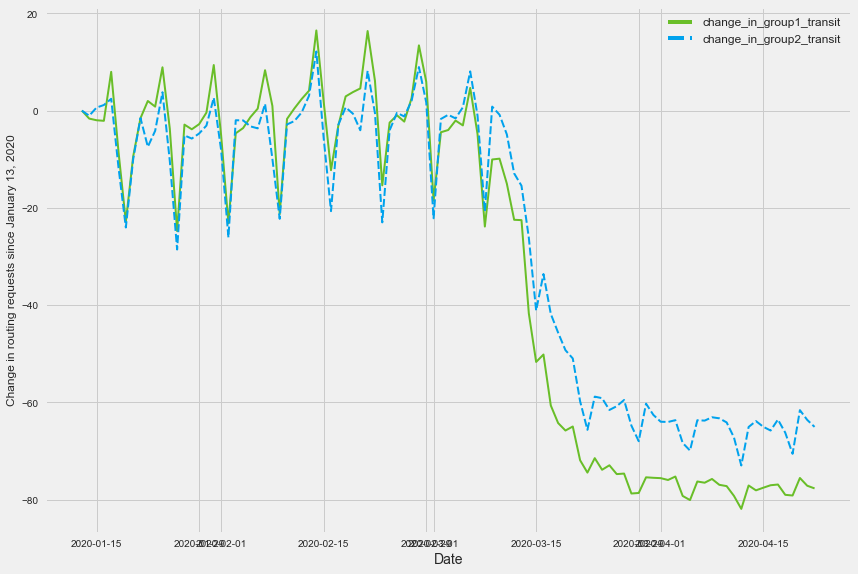

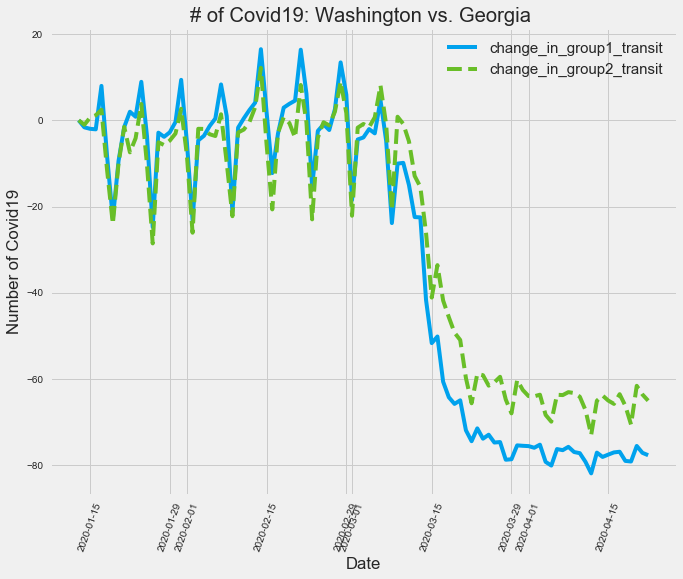

In [165]:
gt=dt
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 8))

plt.tight_layout()
sns.lineplot(data=gt[['change_in_group1_transit', 'change_in_group2_transit']], palette=["#69BE28", "#00a2ed"],lw=2)
plt.xlabel("Date",fontsize=14)
plt.ylabel('Change in routing requests since January 13, 2020', fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.figure(figsize=(10,8))
ax = plt.gca()

# multiple line plot
plt.plot(gt.index,'change_in_group1_transit', data=gt, color="#00a2ed", linewidth=4)
plt.xticks(rotation=70)
    
plt.plot( gt.index, 'change_in_group2_transit', data=gt, marker='', color="#69BE28", linewidth=4, linestyle='dashed')


plt.ylabel('Number of Covid19')
plt.xlabel('Date')
plt.title('# of Covid19: Washington vs. Georgia ')

    
plt.legend(fontsize=15)

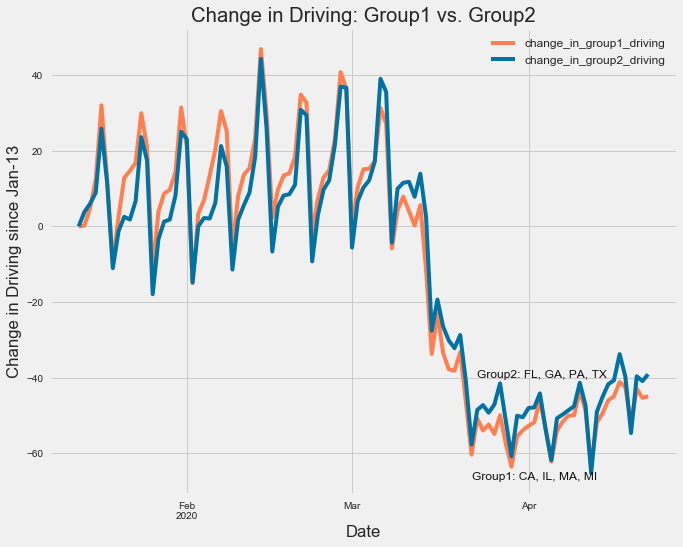

In [171]:
#change in driving
plt.figure(figsize=(10,8))

with pd.plot_params.use('x_compat', True):
    ax1=gt['change_in_group1_driving'].plot(color='coral')
    ax2=gt['change_in_group2_driving'].plot(style=['b-'])

ax1.set_xlabel("Date")
ax1.set_ylabel("Change in Driving since Jan-13")
ax1.set_title("Change in Driving: Group1 vs. Group2")
plt.text("2020-03-22", -67, 'Group1: CA, IL, MA, MI', horizontalalignment='left', size=12, color="k")
plt.text("2020-03-23", -40, 'Group2: FL, GA, PA, TX', horizontalalignment='left', size=12, color="k")

handles, labels=ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper right', prop={"size":12})

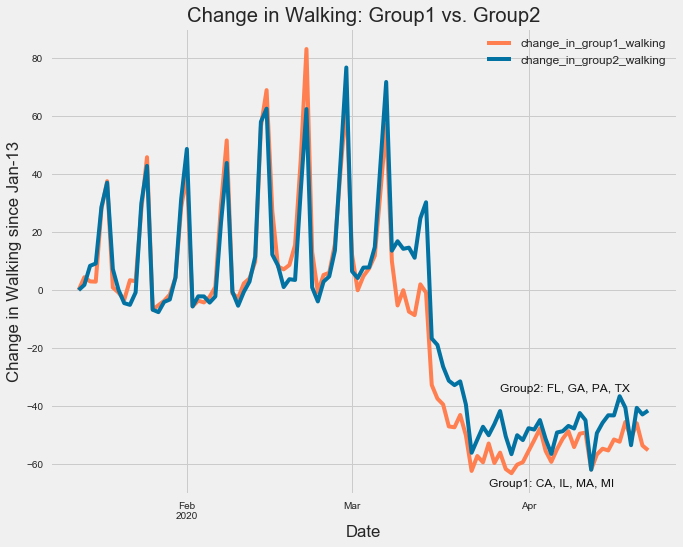

In [176]:
#change in walking
plt.figure(figsize=(10,8))

with pd.plot_params.use('x_compat', True):
    ax1=gt['change_in_group1_walking'].plot(color='coral')
    ax2=gt['change_in_group2_walking'].plot(style=['b-'])

ax1.set_xlabel("Date")
ax1.set_ylabel("Change in Walking since Jan-13")
ax1.set_title("Change in Walking: Group1 vs. Group2")
plt.text("2020-03-25", -68, 'Group1: CA, IL, MA, MI', horizontalalignment='left', size=12, color="k")
plt.text("2020-03-27", -35, 'Group2: FL, GA, PA, TX', horizontalalignment='left', size=12, color="k")

handles, labels=ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper right', prop={"size":12})

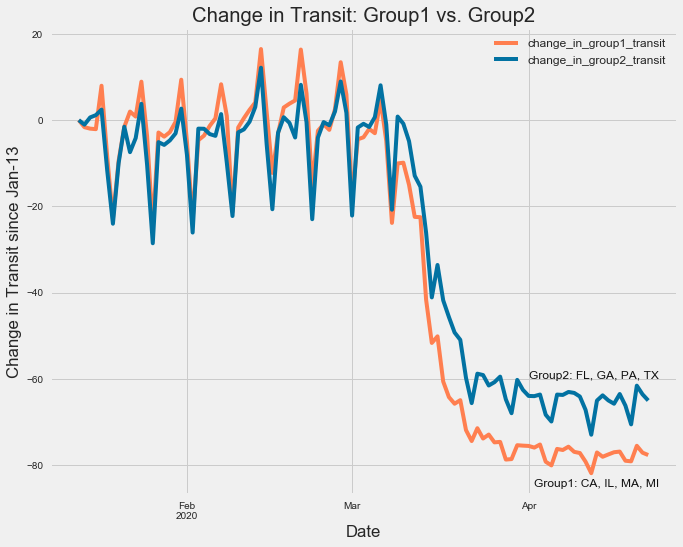

In [167]:
#change in transit
plt.figure(figsize=(10,8))

with pd.plot_params.use('x_compat', True):
    ax1=gt['change_in_group1_transit'].plot(color='coral')
    ax2=gt['change_in_group2_transit'].plot(style=['b-'])

ax1.set_xlabel("Date")
ax1.set_ylabel("Change in Transit since Jan-13")
ax1.set_title("Change in Transit: Group1 vs. Group2")
plt.text("2020-04-02", -85, 'Group1: CA, IL, MA, MI', horizontalalignment='left', size=12, color="k")
plt.text("2020-04-01", -60, 'Group2: FL, GA, PA, TX', horizontalalignment='left', size=12, color="k")

handles, labels=ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper right', prop={"size":12})

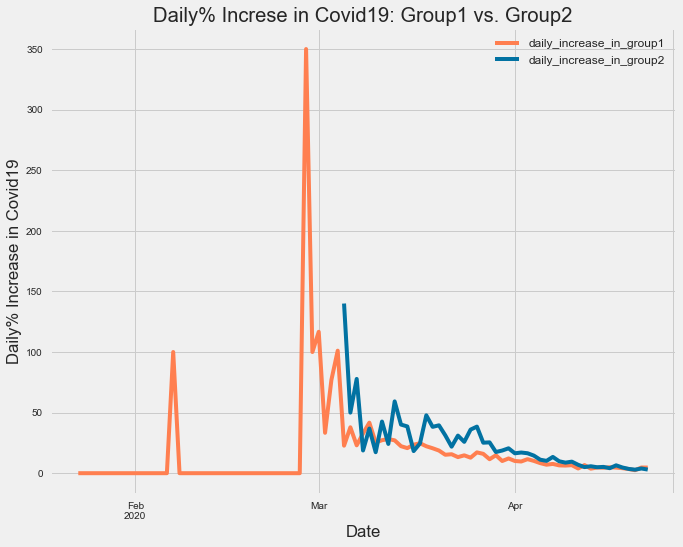

In [101]:
#change in daily counts
plt.figure(figsize=(10,8))

with pd.plot_params.use('x_compat', True):
    ax1=gt['daily_increase_in_group1'].plot(color='coral')
    ax2=gt['daily_increase_in_group2'].plot(style=['b-'])

ax1.set_xlabel("Date")
ax1.set_ylabel("Daily% Increase in Covid19")
ax1.set_title("Daily% Increse in Covid19: Group1 vs. Group2")

handles, labels=ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper right', prop={"size":12})

In [123]:
#change in daily counts
pt=gt.reset_index()
pt = pt[pt['Date']>="2020-03-01"]

In [125]:
#set date as index
pt.set_index('Date', inplace=True)

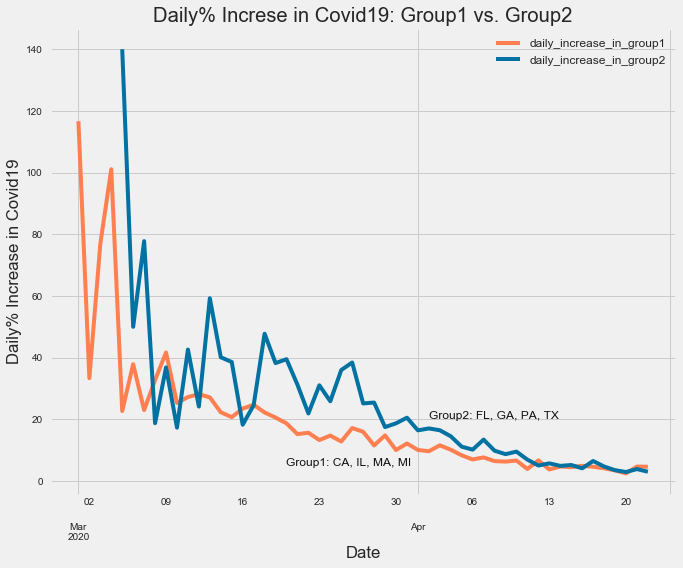

In [160]:
plt.figure(figsize=(10,8))

with pd.plot_params.use('x_compat', True):
    ax1=pt['daily_increase_in_group1'].plot(color='coral')
    ax2=pt['daily_increase_in_group2'].plot(style=['b-'])

ax1.set_xlabel("Date")
ax1.set_ylabel("Daily% Increase in Covid19")
ax1.set_title("Daily% Increse in Covid19: Group1 vs. Group2")
plt.text("2020-03-20", 5, 'Group1: CA, IL, MA, MI', horizontalalignment='left', size=12, color="k")
plt.text("2020-04-02", 20, 'Group2: FL, GA, PA, TX', horizontalalignment='left', size=12, color="k")

handles, labels=ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper right', prop={"size":12})

In [66]:
def trend_growth_plot(col1, col2, col3, col4, city, state, date):
    
    plt_dt = dt[[col1, col2, col3, col4]]
    plt_dt[col1] = (plt_dt[col1]/100-1).round(4)*100
    plt_dt[col2] = (plt_dt[col2]/100-1).round(4)*100
    plt_dt[col3] = (plt_dt[col3]/100-1).round(4)*100
    plt_dt['Daily_Increase_percent_Covid19'] = ((plt_dt[col4]/plt_dt[col4].shift(1))-1).round(4)*100
    plt_dt['Daily_Increase_Covid19'] = plt_dt[col4]-plt_dt[col4].shift(1)

    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(12, 8))

    plt.tight_layout()
    sns.lineplot(data=plt_dt[[col1, col2, col3]], palette=["#69BE28", "#00a2ed", 'darkblue'],lw=2)
    plt.xlabel("Date",fontsize=14)
    plt.ylabel('Change in routing requests since January 13, 2020', fontsize=12)
    plt.legend(loc='lower left', fontsize=12)
    plt.axvline(x=date,  color ='gray').set_linestyle("--")
     
    #secondary y-axis
    ax1 = plt.twinx()
    sns.lineplot(data=plt_dt[[col4,'Daily_Increase_Covid19']],  palette=["y", "coral"], lw=4, dashes = False)
    #sns.lineplot(data=plt_dt['Daily_Increase_Covid19'],  color="coral", lw=4)
    ax1.xaxis.set_major_formatter(myFmt)
    ax1.set_xticks(dt.index[::12]) 
    ax1.set_ylabel('# of Covid19 Cases', fontsize=14)
    ax1.set_title("Mobility Trends in " + city + " and Covid19 Trends in " + state)
    fig.savefig(city+ "_"+state+".pdf")
    return plt.show()

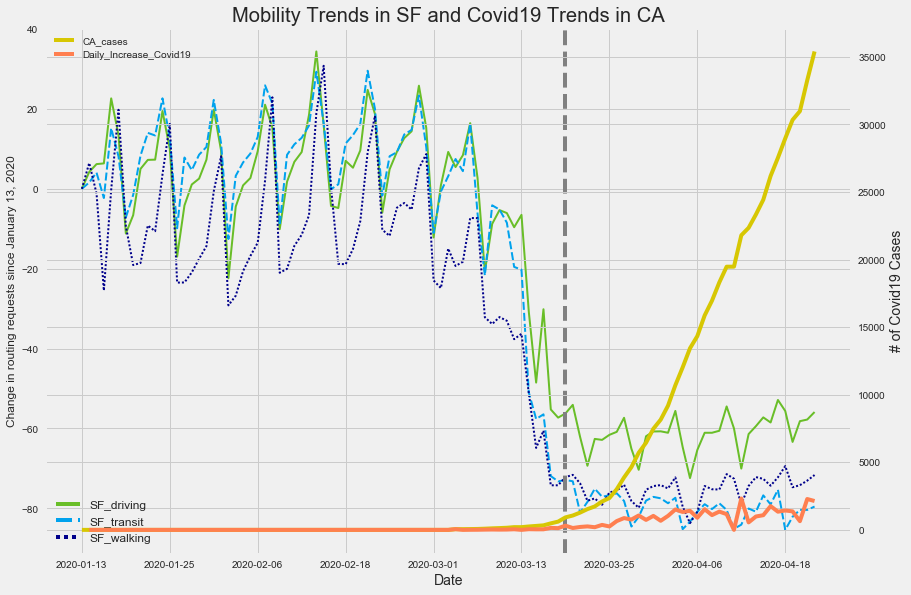

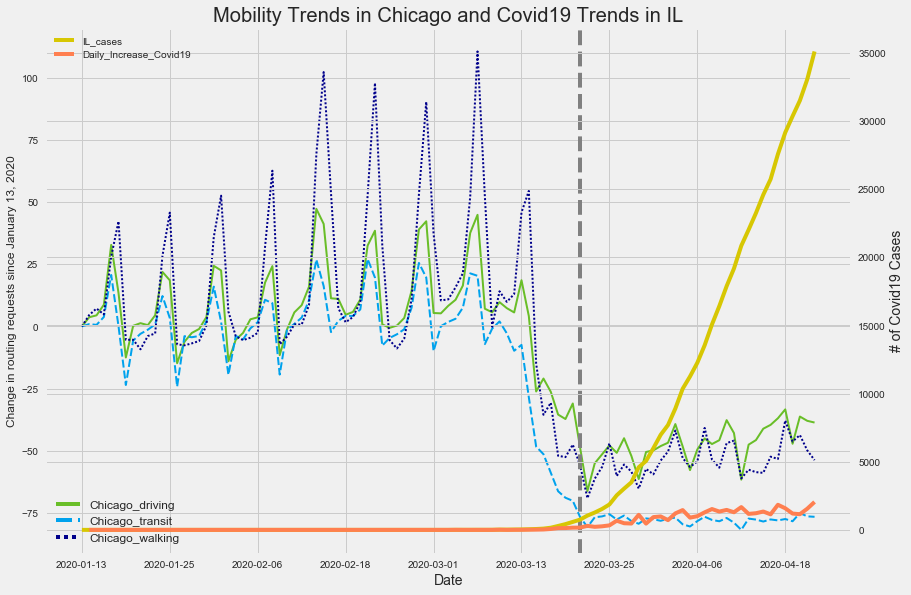

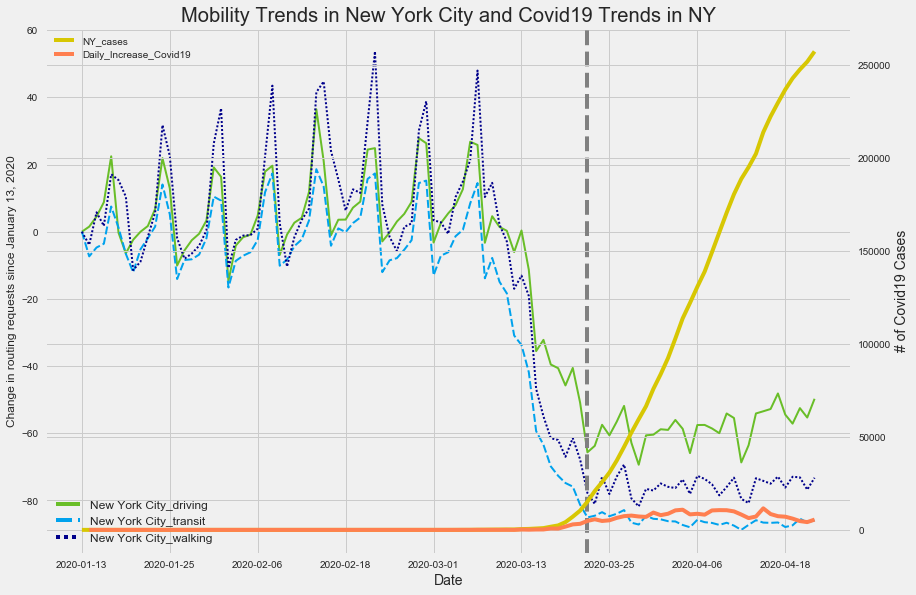

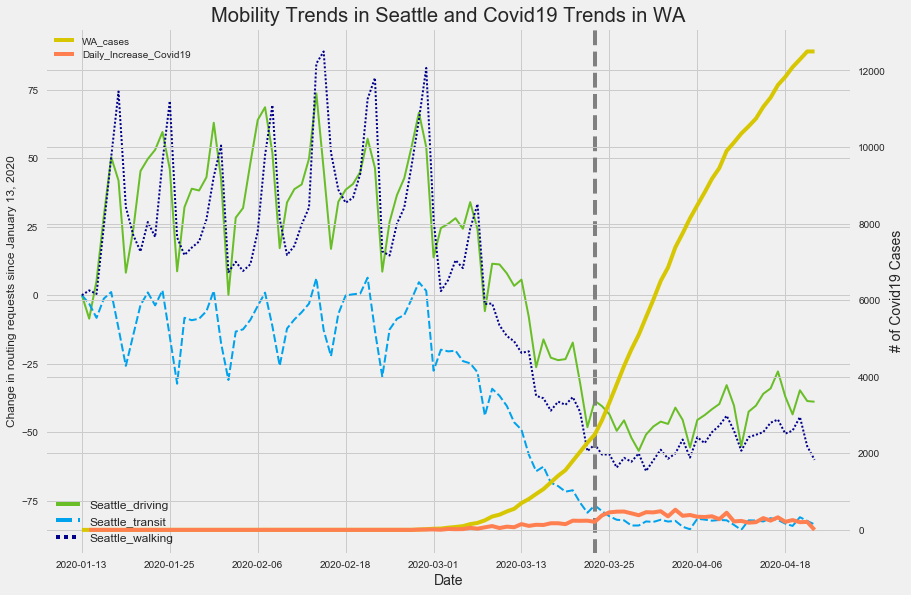

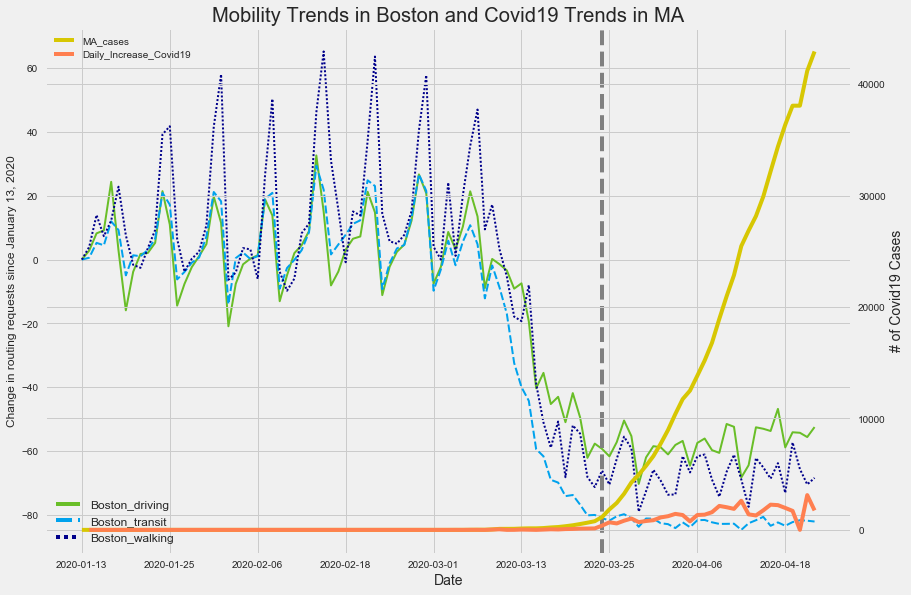

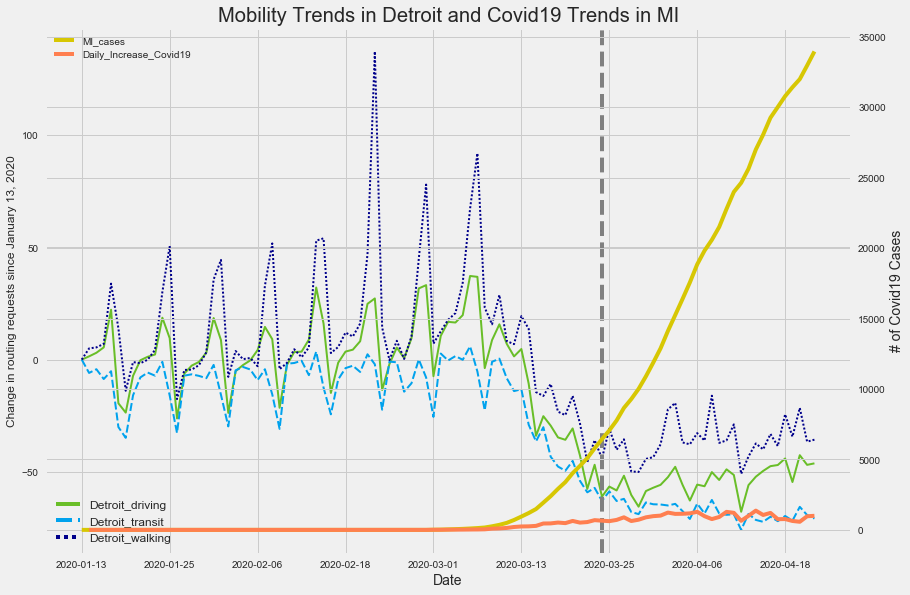

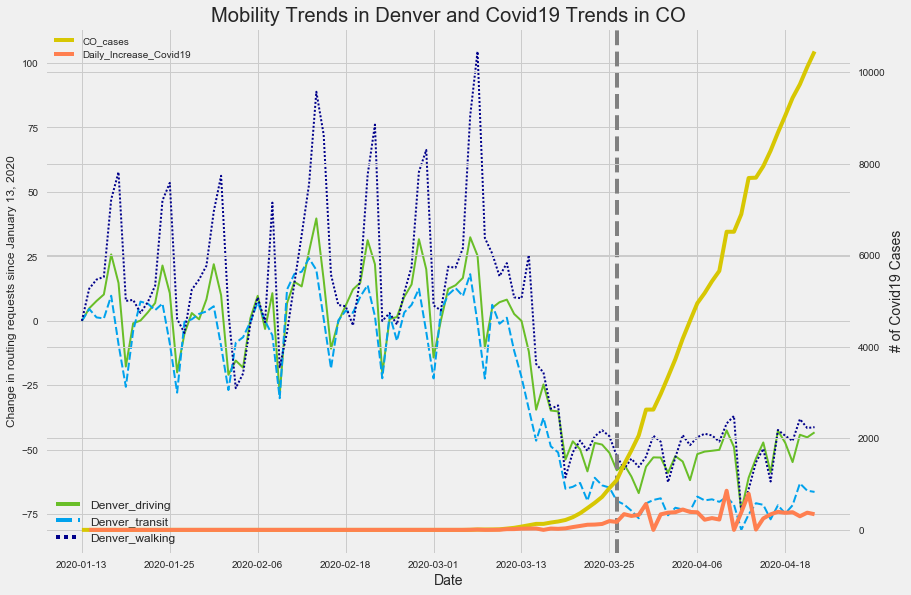

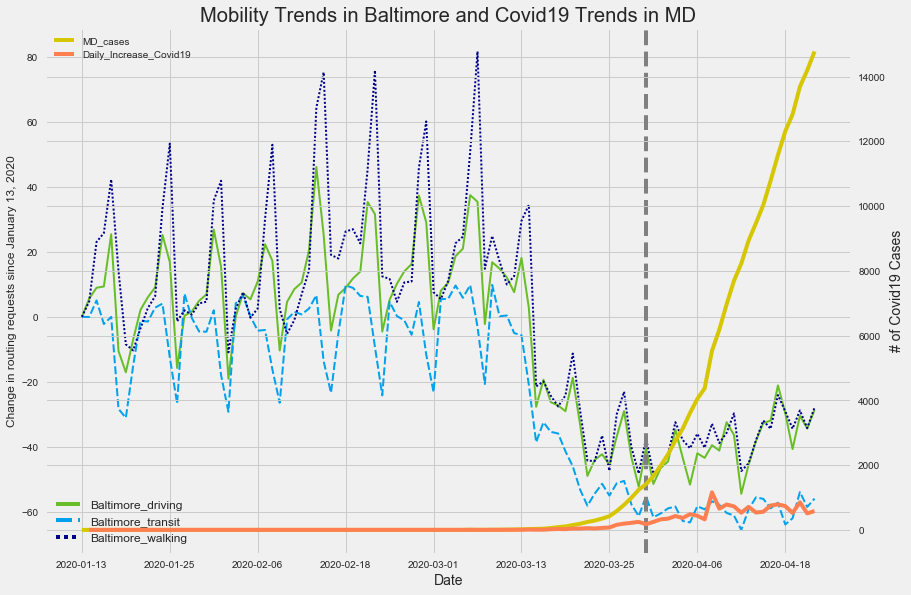

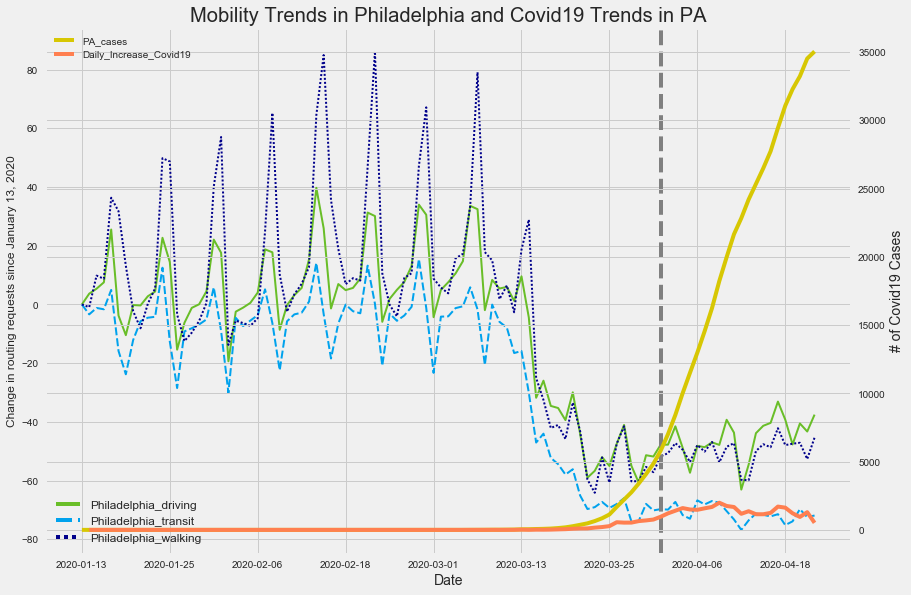

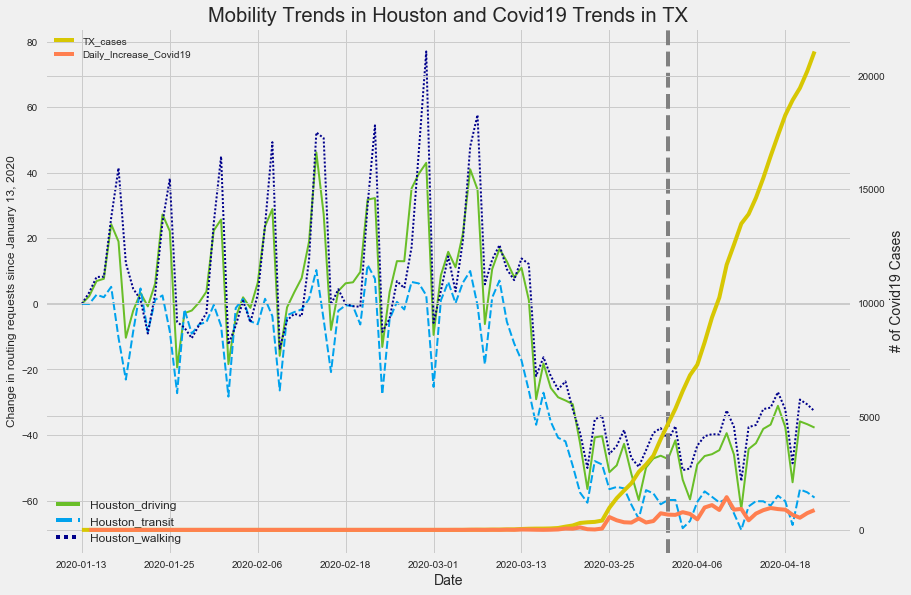

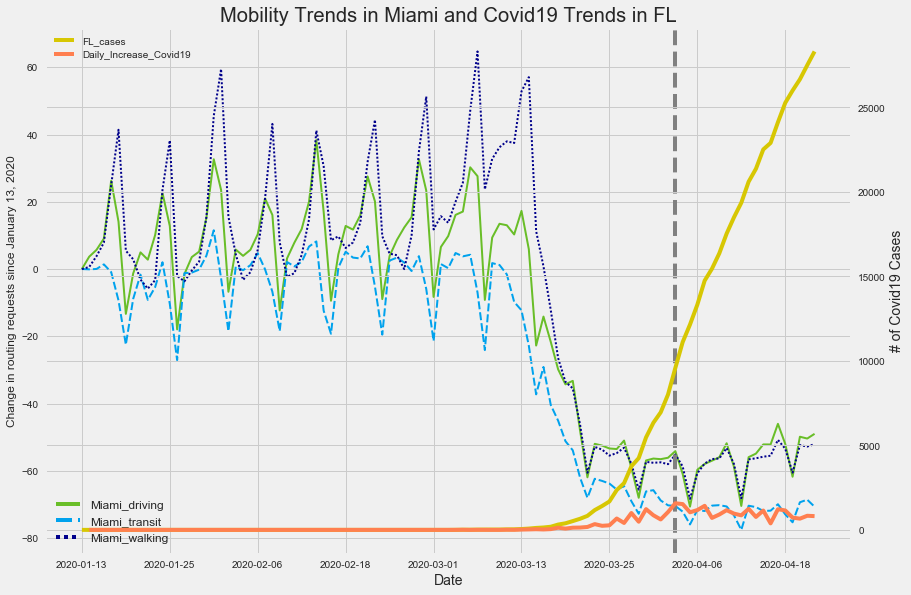

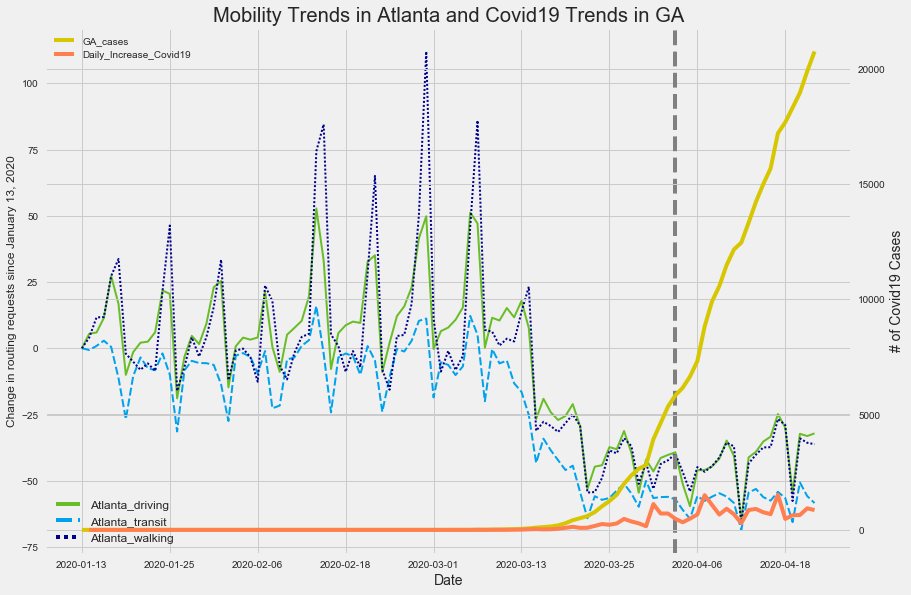

In [162]:
trend_growth_plot('SF_driving', 'SF_transit', 'SF_walking','CA_cases', 'SF', 'CA', "2020-03-19")
trend_growth_plot('Chicago_driving', 'Chicago_transit', 'Chicago_walking','IL_cases', 'Chicago', 'IL', "3/21/2020")
trend_growth_plot('New York City_driving', 'New York City_transit', 'New York City_walking','NY_cases', 'New York City', 'NY', "3/22/2020")
trend_growth_plot('Seattle_driving', 'Seattle_transit', 'Seattle_walking','WA_cases', 'Seattle', 'WA', "3/23/2020")
trend_growth_plot('Boston_driving', 'Boston_transit', 'Boston_walking','MA_cases', 'Boston', 'MA', "3/24/2020")
trend_growth_plot('Detroit_driving', 'Detroit_transit', 'Detroit_walking','MI_cases', 'Detroit', 'MI', "3/24/2020")
trend_growth_plot('Denver_driving', 'Denver_transit', 'Denver_walking','CO_cases', 'Denver', 'CO', "3/26/2020")
trend_growth_plot('Baltimore_driving', 'Baltimore_transit', 'Baltimore_walking','MD_cases', 'Baltimore', 'MD', "3/30/2020")
trend_growth_plot('Philadelphia_driving', 'Philadelphia_transit', 'Philadelphia_walking','PA_cases', 'Philadelphia', 'PA', "4/01/2020")
trend_growth_plot('Houston_driving', 'Houston_transit', 'Houston_walking','TX_cases', 'Houston', 'TX', "4/02/2020")
trend_growth_plot('Miami_driving', 'Miami_transit', 'Miami_walking','FL_cases', 'Miami', 'FL', "4/3/2020")
trend_growth_plot('Atlanta_driving', 'Atlanta_transit', 'Atlanta_walking','GA_cases', 'Atlanta', 'GA', "4/3/2020")